In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/ZYJ/Desktop/disease-disease simlarity network/supple —Uncovering disease-disease relationship through hte incomplete inteactome/data/DataS4_disease_pairs.tsv"
                   ,skiprows=32,sep="\t")

In [3]:
data.shape

(44551, 10)

In [4]:
data.rename(columns= {"# disease_A": "disease_A"},inplace =True)
data.head()

,disease_A,disease_B,s_AB (observed),d_AB (observed),z (full rand),p (full rand),q (full rand),z (MeSH rand),p (MeSH rand),q (MeSH rand)
0,"abnormalities, multiple",actinomycetales infections,0.810442,2.285714,7.982630,0.000000,0.000000,7.906231,0.000,0.000000
1,"abnormalities, multiple",adenocarcinoma,0.306936,1.929936,3.013859,0.002250,0.003012,3.194432,0.000,0.001855
2,"abnormalities, multiple",adnexal diseases,0.366111,1.960265,3.129573,0.001125,0.002180,3.581272,0.000,0.000552
3,"abnormalities, multiple",adrenal gland diseases,0.649266,2.161972,5.250200,0.000000,0.000002,5.535807,0.000,0.000002
4,"abnormalities, multiple",albuminuria,0.212946,2.532374,0.141110,0.425197,0.687182,0.241369,0.404,0.642153


In [5]:
#data[["disease_A","disease_B","s_AB (observed)"]].to_csv("dis_sim.csv",header=True,index= False)

In [6]:
data.columns

Index(['disease_A', 'disease_B', 's_AB (observed)', 'd_AB (observed)',
       'z (full rand)', 'p (full rand)', 'q (full rand)', 'z (MeSH rand)',
       'p (MeSH rand)', 'q (MeSH rand)'],
      dtype='object')

In [7]:
data[["disease_A","disease_B","s_AB (observed)"]].head()

,disease_A,disease_B,s_AB (observed)
0,"abnormalities, multiple",actinomycetales infections,0.810442
1,"abnormalities, multiple",adenocarcinoma,0.306936
2,"abnormalities, multiple",adnexal diseases,0.366111
3,"abnormalities, multiple",adrenal gland diseases,0.649266
4,"abnormalities, multiple",albuminuria,0.212946


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44551 entries, 0 to 44550
Data columns (total 10 columns):
disease_A          44551 non-null object
disease_B          44551 non-null object
s_AB (observed)    44551 non-null float64
d_AB (observed)    44551 non-null float64
z (full rand)      44551 non-null float64
p (full rand)      44551 non-null float64
q (full rand)      44551 non-null float64
z (MeSH rand)      44551 non-null float64
p (MeSH rand)      44551 non-null float64
q (MeSH rand)      44551 non-null float64
dtypes: float64(8), object(2)
memory usage: 3.4+ MB


In [9]:
score = data["s_AB (observed)"]

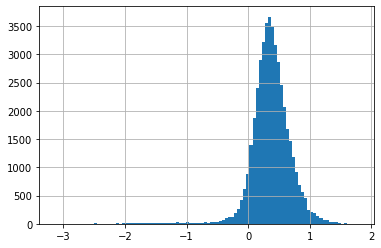

In [10]:
plt.figure()
score.hist(bins=100)
plt.show()

### Turn s_AB (observed) to 0, 1 disease pair label

In [11]:
data[score < 0]

,disease_A,disease_B,s_AB (observed),d_AB (observed),z (full rand),p (full rand),q (full rand),z (MeSH rand),p (MeSH rand),q (MeSH rand)
62,"abnormalities, multiple",chromosome disorders,-0.119505,1.445161,-2.892310,0.002250,0.004478,6.802457,1.000,3.103858e-08
68,"abnormalities, multiple",congenital abnormalities,-0.489024,0.928713,-13.757727,0.000000,0.000000,8.256546,1.000,0.000000e+00
193,"abnormalities, multiple",musculoskeletal abnormalities,-0.193015,1.272727,-3.656246,0.000000,0.000387,5.967400,1.000,2.573727e-07
194,"abnormalities, multiple",musculoskeletal diseases,-0.035253,1.461905,-1.160433,0.123735,0.245537,6.896493,1.000,1.626331e-08
262,"abnormalities, multiple",skin abnormalities,-0.050429,1.505263,-1.091116,0.146232,0.275570,9.369358,1.000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
44530,uveitis,"uveitis, anterior",-2.153846,0.000000,-13.999752,0.000000,0.000000,1.938227,0.969,5.400610e-02
44533,uveitis,vasculitis,-2.000733,0.142857,-13.498744,0.000000,0.000000,1.912966,0.971,5.726970e-02
44538,"uveitis, anterior",vasculitis,-2.000733,0.142857,-13.535322,0.000000,0.000000,1.912966,0.971,5.726970e-02
44541,varicose veins,vascular diseases,-0.159130,1.975124,-4.105337,0.000000,0.000102,0.374481,0.661,5.845993e-01


In [12]:
score[score >= 0] = 0
score[score < 0] = 1
data[score ==1]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,disease_A,disease_B,s_AB (observed),d_AB (observed),z (full rand),p (full rand),q (full rand),z (MeSH rand),p (MeSH rand),q (MeSH rand)
62,"abnormalities, multiple",chromosome disorders,1.0,1.445161,-2.892310,0.002250,0.004478,6.802457,1.000,3.103858e-08
68,"abnormalities, multiple",congenital abnormalities,1.0,0.928713,-13.757727,0.000000,0.000000,8.256546,1.000,0.000000e+00
193,"abnormalities, multiple",musculoskeletal abnormalities,1.0,1.272727,-3.656246,0.000000,0.000387,5.967400,1.000,2.573727e-07
194,"abnormalities, multiple",musculoskeletal diseases,1.0,1.461905,-1.160433,0.123735,0.245537,6.896493,1.000,1.626331e-08
262,"abnormalities, multiple",skin abnormalities,1.0,1.505263,-1.091116,0.146232,0.275570,9.369358,1.000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
44530,uveitis,"uveitis, anterior",1.0,0.000000,-13.999752,0.000000,0.000000,1.938227,0.969,5.400610e-02
44533,uveitis,vasculitis,1.0,0.142857,-13.498744,0.000000,0.000000,1.912966,0.971,5.726970e-02
44538,"uveitis, anterior",vasculitis,1.0,0.142857,-13.535322,0.000000,0.000000,1.912966,0.971,5.726970e-02
44541,varicose veins,vascular diseases,1.0,1.975124,-4.105337,0.000000,0.000102,0.374481,0.661,5.845993e-01


In [14]:
#data["s_AB (observed)"].to_csv("cls_label.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
